<a href="https://colab.research.google.com/github/mohammed893/Tensor_Flow_Cheat_sheet-/blob/main/NN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Intro to Regression with NeuralNetworks in TensorFlow

In [2]:
#Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.14.0


## Creating Data to view and fit

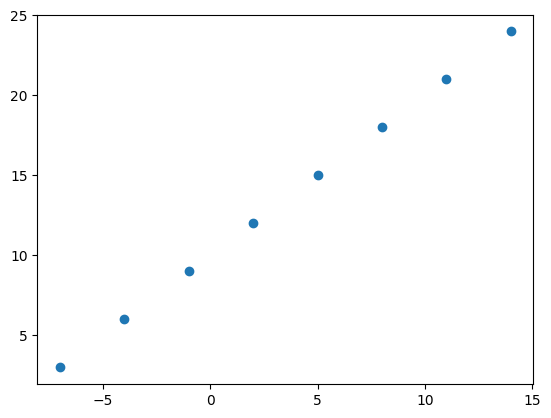

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Create Features
x = np.array([-7.0,-4.0 , -1.0 , 2.0 , 5.0 , 8.0 ,11.0 ,14.0 ])

#Create Labels
y = np.array([3.0 , 6.0 , 9.0 , 12.0 , 15.0 , 18.0 , 21.0 , 24.0 ])

#Visualize it
plt.scatter(x , y);


#*INPUTS AND OUTPUTS SHAPES*



In [4]:
#Creating a demo tensor for housing price prediction problem
house_info = tf.constant(['bedroom' , 'bathroom' , 'garage'])
house_price = tf.constant([939700])
house_info , house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

#Steps in modelling with tensorflow


1.   Create the model - Define inputs , outputs Layers as well as the hidden layers of a DL Model
2.   Compile a model - Define the >> *loss function* and the >> *optimizer*(Thing that tell that model how to improve the patterns its learning) and >> *Evaluation* metrics (What we can use to interpret the performance)

3.   Fitting the Model




# Evaluating A model

In [5]:
#Make a bigger DataSet
x = tf.range(-100 , 100 , 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [6]:
# Make Labels for the data set
y = x + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

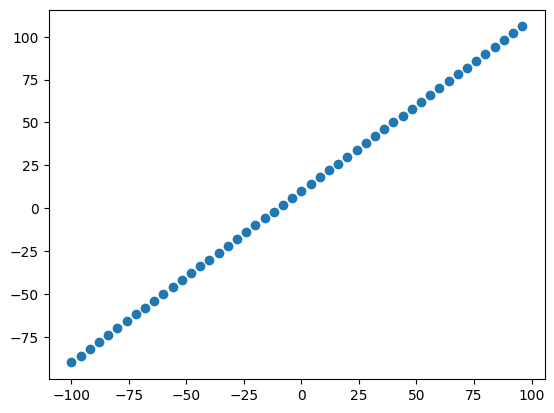

In [7]:
#Visualize the Data
import matplotlib.pyplot as plt
plt.scatter(x , y)

In [8]:
### The 3 Sets ... Training Set , Validation Set , Test Set



In [9]:
#Check the length
len(x) , len(y)

(50, 50)

In [10]:
#Split the data into train and test sets
x_train = x[:40] #First 40
x_test  = x[40:] #Last 10
y_train = y[:40]
y_test = y[40:]
len(x_train) ,len(x_test) , len(y_train) , len(y_test )


(40, 10, 40, 10)

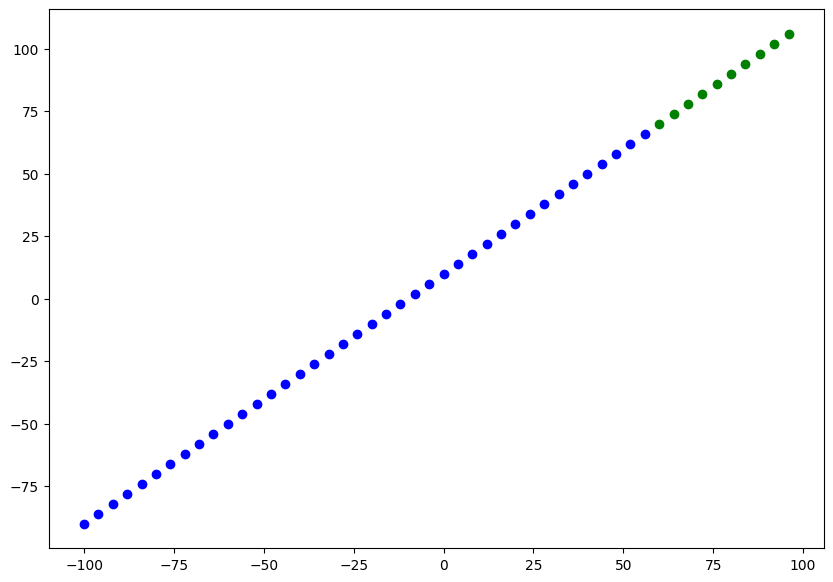

In [11]:
### Visualizing the Data
plt.figure(figsize = (10 , 7))
plt.scatter(x_train, y_train , c ='b' , label = "Training")
plt.scatter(x_test, y_test , c ='g' , label = "Test")


In [20]:
from keras.src.backend import learning_phase
from tensorflow.python.ops.gen_nn_ops import lrn
#Let's build a neural network for our data
model = tf.keras.Sequential([tf.keras.layers.Dense(10 , input_shape = [1] , name = 'InPut') ,
                             tf.keras.layers.Dense(1, activation='relu', input_shape=[1]),
                             tf.keras.layers.Dense(1 , name = "Out")] , name = "One_of_my_Models")
#Compile the model
model.compile(loss = tf.keras.losses.mae ,
              optimizer =tf.keras.optimizers.SGD(learning_rate=0.001) ,
              metrics=["mae"] ,
              )
# #Fit the model
model.fit(x_train , y_train , epochs = 110)

Epoch 1/110
2/2 [==============================] - 0s 8ms/step - loss: 34.5910 - mae: 34.5910
Epoch 2/110
2/2 [==============================] - 0s 7ms/step - loss: 33.3040 - mae: 33.3040
Epoch 3/110
2/2 [==============================] - 0s 7ms/step - loss: 31.9852 - mae: 31.9852
Epoch 4/110
2/2 [==============================] - 0s 7ms/step - loss: 30.7957 - mae: 30.7957
Epoch 5/110
2/2 [==============================] - 0s 7ms/step - loss: 29.6525 - mae: 29.6525
Epoch 6/110
2/2 [==============================] - 0s 6ms/step - loss: 28.5362 - mae: 28.5362
Epoch 7/110
2/2 [==============================] - 0s 6ms/step - loss: 28.3302 - mae: 28.3302
Epoch 8/110
2/2 [==============================] - 0s 8ms/step - loss: 28.2799 - mae: 28.2799
Epoch 9/110
2/2 [==============================] - 0s 7ms/step - loss: 28.3970 - mae: 28.3970
Epoch 10/110
2/2 [==============================] - 0s 7ms/step - loss: 28.7800 - mae: 28.7800
Epoch 11/110
2/2 [==============================] - 0s 7ms/

In [13]:
#Visualize the model
model.summary()
#Trainable params ---> the model can update as it trains
#Non_trainable params --->Are Not updated during training (Kinda a Transfer Learning )



Model: "One_of_my_Models"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InPut (Dense)               (None, 10)                20        
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
 Out (Dense)                 (None, 1)                 2         
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


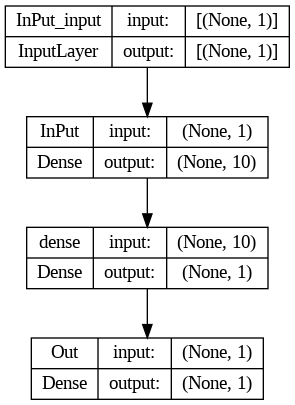

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(model = model , show_shapes = True)

### Visualizing our model's Predictions
To Viseualize predictions , it's a good idea to plot them against the ground Truth labels

In [21]:
y_preds = model.predict(x_test)
y_preds

1/1 [==============================] - 0s 59ms/step


array([[ 74.060715],
       [ 78.99332 ],
       [ 83.92592 ],
       [ 88.85853 ],
       [ 93.791115],
       [ 98.72373 ],
       [103.65633 ],
       [108.58893 ],
       [113.521515],
       [118.45413 ]], dtype=float32)

In [22]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [23]:
def plot_predictions(train_data = x_train ,
                     train_labels = y_train ,
                     test_data = x_test ,
                     test_labels = y_test ,
                     predictions = y_preds):
  "Plot training data , test data and compares predictions to Ground truth Labels"
  plt.figure(figsize = (10 , 7))
  plt.scatter(train_data , train_labels , c = 'b' , label = "Training")
  plt.scatter(test_data , test_labels , c = 'g' , label = "Testing")
  plt.scatter(test_data , predictions , c = 'r' , label = "Predictions")
  #Show the legend
  plt.legend()

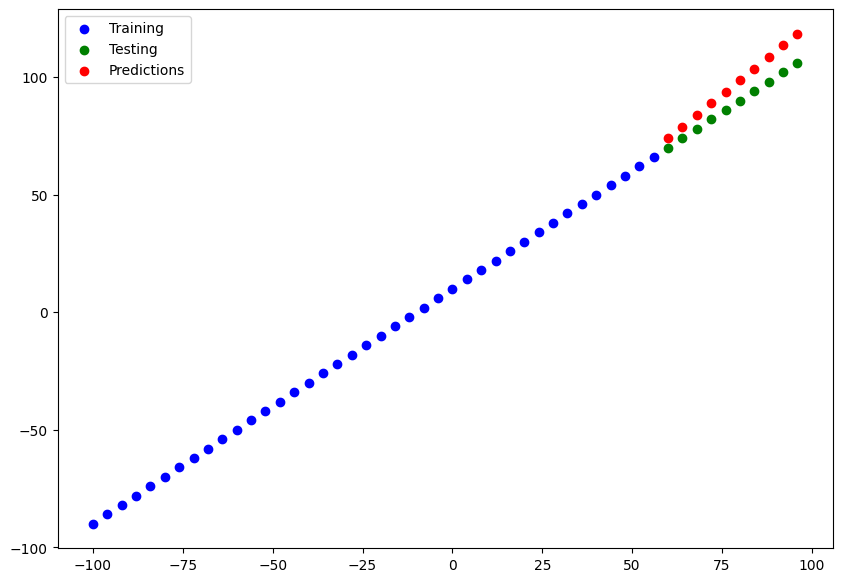

In [24]:
plot_predictions()

In [28]:
### Evaluating our preds with reg evaluation metrics

#---> Mean Absolute Error MAE
tf.metrics.mean_absolute_error(y_true= y_test , y_pred=tf.squeeze(y_preds))



<tf.Tensor: shape=(), dtype=float32, numpy=8.257422>

In [27]:
#---> Mean Squared Error MAE
tf.metrics.mean_squared_error(y_true=y_test , y_pred = tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=75.36043>

In [36]:
#Make some functions to reuse MAE and MSE
def mae(y_true , y_pred):
  return tf.metrics.mean_absolute_error(y_true= y_true , y_pred=tf.squeeze(y_pred))

def mse(y_true , y_pred):
  return tf.metrics.mean_squared_error(y_true= y_true , y_pred=tf.squeeze(y_pred))

#Running Experiments to improve our model
* --> Get More data
* --> Make ur Model Larger
* --> Train for longer
---------------------
1. Model_1 : same as the original one , 1 layer , trained for 100 steps

2. Model_2 : 2 layers , trained for 100 epochs

3. Model_3 : 2 layers , trained for 500 epochs


In [ ]:
#Set Random seed
tf.random.set_seed(42)

#1.Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2.Compile the model
model_1.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.SGD() ,
                metrics = ["mae"])

#3.Fit the model
model_1.fit(tf.expand_dims(x_train , axis = -1) , y_train , epochs = 100 )

1/1 [==============================] - 0s 30ms/step


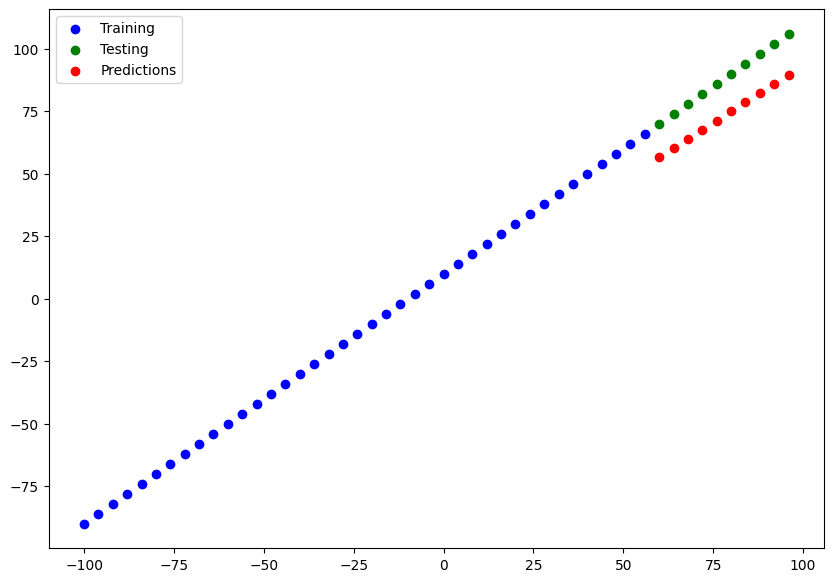

In [33]:
#Make and plot predictions with Model_1
y_preds_1 = model_1.predict(x_test)
plot_predictions(predictions=y_preds_1)

In [66]:
#Calculate model_1 evaluation metrics
mae_1 = mae(y_test , y_preds_1)
mse_1 = mse(y_test , y_preds_1)
mae_1 , mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.897168>,
 <tf.Tensor: shape=(), dtype=float32, numpy=222.75632>)

In [ ]:
from os import name
#Building Model_2 --> 2 Dense Layers , trained for 100 epochs
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10 , name = "INPUT_LAYER") ,
    tf.keras.layers.Dense(1),
])

model_2.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.SGD(),
                metrics="mse"
                )
model_2.fit(tf.expand_dims(x_train , axis = -1) , y_train , epochs = 100 )


In [127]:
y_pred_2 = model_2.predict(x_test)
y_pred_2 , y_test


1/1 [==============================] - 0s 24ms/step


(array([[ 69.6549  ],
        [ 74.18427 ],
        [ 78.713646],
        [ 83.24301 ],
        [ 87.77239 ],
        [ 92.30175 ],
        [ 96.83112 ],
        [101.3605  ],
        [105.88986 ],
        [110.419235]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

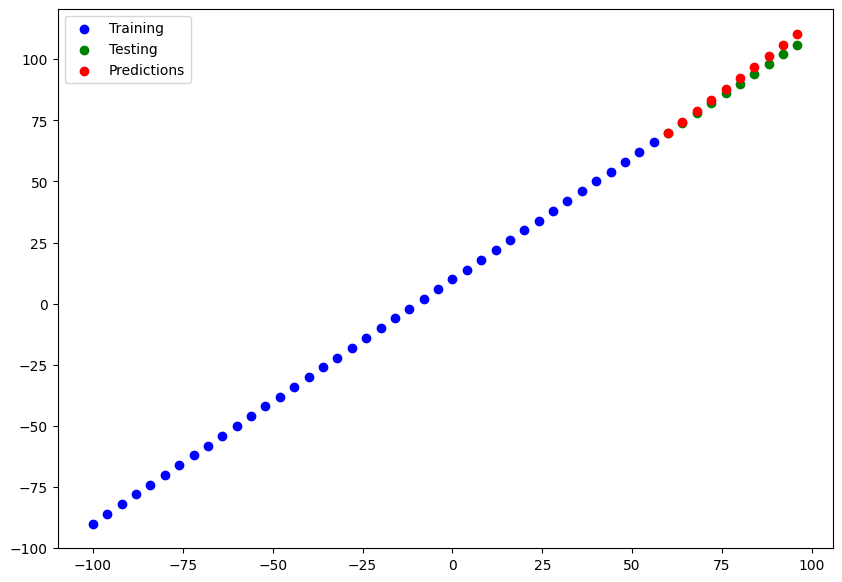

In [128]:
plot_predictions(predictions=y_pred_2)

In [87]:
mae_2 = mae(y_test , y_pred_2)
mse_2 = mse(y_test , y_pred_2)
mae_2 , mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.903225>,
 <tf.Tensor: shape=(), dtype=float32, numpy=126.860916>)

In [145]:
#Build Model_3 --> 2 Layers with 500 epochs
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(
    loss = tf.keras.losses.mae ,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = 'mse'
)
model_3.fit(tf.expand_dims(x_train , axis = -1) , y_train , epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 17ms/step - loss: 52.1496 - mse: 4271.8999
Epoch 2/500
2/2 [==============================] - 0s 11ms/step - loss: 21.6811 - mse: 740.0758
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 19.2917 - mse: 543.6026
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 13.9816 - mse: 256.0744
Epoch 5/500
2/2 [==============================] - 0s 13ms/step - loss: 15.5565 - mse: 311.9785
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 12.3465 - mse: 192.3516
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 11.6358 - mse: 165.8979
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 12.0571 - mse: 196.9995
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 37.6810 - mse: 2186.6184
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 25.3197 - mse: 899.4746
Epoch 11/500
2/2 [=========================

In [146]:
y_pred_3 = model_3.predict(x_test)
y_pred_3


1/1 [==============================] - 0s 54ms/step


array([[16.442293],
       [17.24663 ],
       [18.050966],
       [18.855305],
       [19.659641],
       [20.463982],
       [21.268318],
       [22.072653],
       [22.87699 ],
       [23.681328]], dtype=float32)

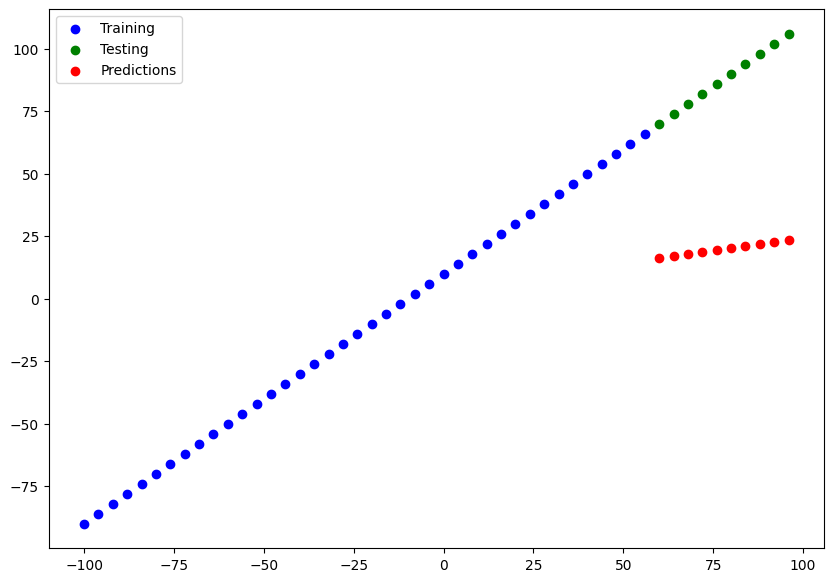

In [147]:
plot_predictions(predictions=y_pred_3)

In [149]:
mae_3 = mae(y_test , y_pred_3)
mse_3 = mse(y_test , y_pred_3)
mae_3 , mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.93819>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4699.8486>)

In [ ]:
#Comparing the results of our experiments
